### Simulation

In [1]:
# import libraries
from single_simulation import run_single_simulation

In [2]:
# run the simulation
gdf_county, gdf_census = run_single_simulation(grid_side_length=7,county_autocorrelation="none", census_autocorrelation="none", random_seed=42,variable_name='Rate_cen')

No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census tracts.
No spatial autocorrelation applied to census t

In [3]:
gdf_county.head(20)

,Index_county,Rate_cou,geometry,up_AL,up_AML,up_TL,up_ML,down_AL,down_AML,down_TL,down_ML,cencus_count
0,0,810,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",14.044716,7.022358,898.861809,449.430904,55.986270,27.993135,3583.121288,1791.560644,64.0
1,1,450,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",20.943945,10.471973,523.598634,261.799317,40.777279,20.388639,1019.431963,509.715981,25.0
2,2,870,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",41.121906,20.560953,1028.047638,514.023819,122.590547,61.295274,3064.763686,1532.381843,25.0
3,3,1050,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))",24.549896,12.274948,1202.944921,601.472460,72.747249,36.373625,3564.615208,1782.307604,49.0
4,4,480,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))",73.573724,36.786862,662.163519,331.081759,142.653590,71.326795,1283.882307,641.941153,9.0
5,5,300,"POLYGON ((5 0, 6 0, 6 1, 5 1, 5 0))",6.986667,3.493334,342.346704,171.173352,21.460695,10.730348,1051.574058,525.787029,49.0
6,6,1050,"POLYGON ((6 0, 7 0, 7 1, 6 1, 6 0))",24.480007,12.240004,1199.520352,599.760176,97.649719,48.824859,4784.836207,2392.418103,49.0
7,7,900,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))",68.919162,34.459581,1102.706597,551.353298,147.213381,73.606690,2355.414094,1177.707047,16.0
8,8,300,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))",96.716851,48.358426,386.867404,193.433702,78.791837,39.395919,315.167348,157.583674,4.0
9,9,480,"POLYGON ((2 1, 3 1, 3 2, 2 2, 2 1))",11.245522,5.622761,551.030566,275.515283,45.788119,22.894059,2243.617828,1121.808914,49.0


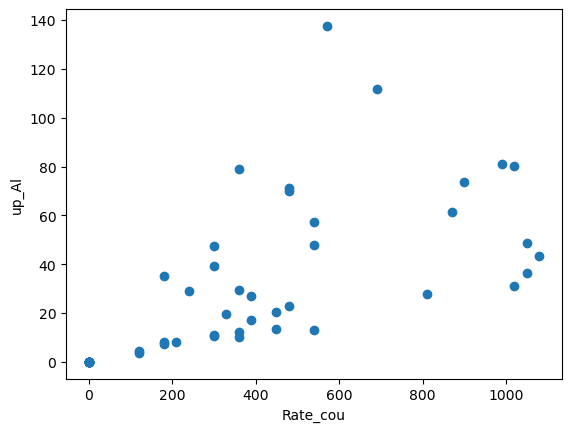

In [4]:
# plot Rate_cou agaiinst up_Al in in gdf_county
import matplotlib.pyplot as plt
plt.scatter(gdf_county['Rate_cou'], gdf_county['down_AML'])
plt.xlabel('Rate_cou')
plt.ylabel('up_Al')
plt.show()

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_53656/1147308056.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(np.linspace(0, 20, 100), model.params[0] + model.params[1] * np.linspace(0, 20, 100), color='red')


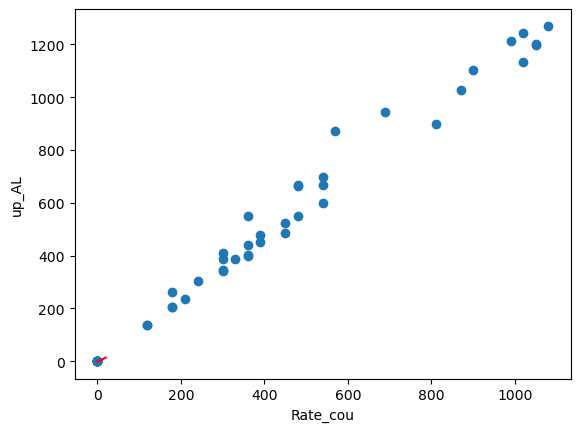

In [5]:
# create a regression model to predict Rate_cou from up_AL
import statsmodels.api as sm
X = gdf_county['up_TL']
y = gdf_county['Rate_cou']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

# plot the regression line
import numpy as np
plt.scatter(gdf_county['Rate_cou'], gdf_county['up_TL'])
plt.xlabel('Rate_cou')
plt.ylabel('up_AL')
plt.plot(np.linspace(0, 20, 100), model.params[0] + model.params[1] * np.linspace(0, 20, 100), color='red')
plt.show()

In [6]:
gdf_census

,Index_census,Rate_cen,geometry,Index_county
0,0,7.479931,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",0
1,1,65.314421,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",0
2,2,2.432573,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",0
3,3,0.229319,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))",0
4,4,8.561518,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))",0
...,...,...,...,...
1493,44,17.755637,"POLYGON ((2 6, 3 6, 3 7, 2 7, 2 6))",48
1494,45,5.865407,"POLYGON ((3 6, 4 6, 4 7, 3 7, 3 6))",48
1495,46,12.000147,"POLYGON ((4 6, 5 6, 5 7, 4 7, 4 6))",48
1496,47,4.943709,"POLYGON ((5 6, 6 6, 6 7, 5 7, 5 6))",48


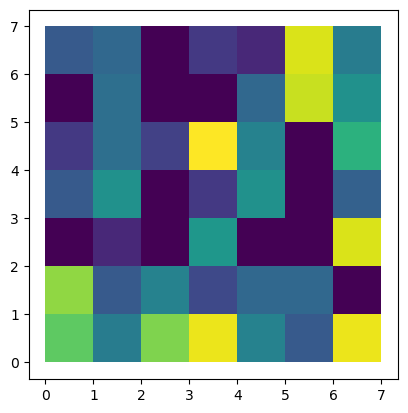

In [7]:
# plot the gdf_county Rate_cou with geometry

gdf_county.plot(column='Rate_cou', legend=False)
plt.show()



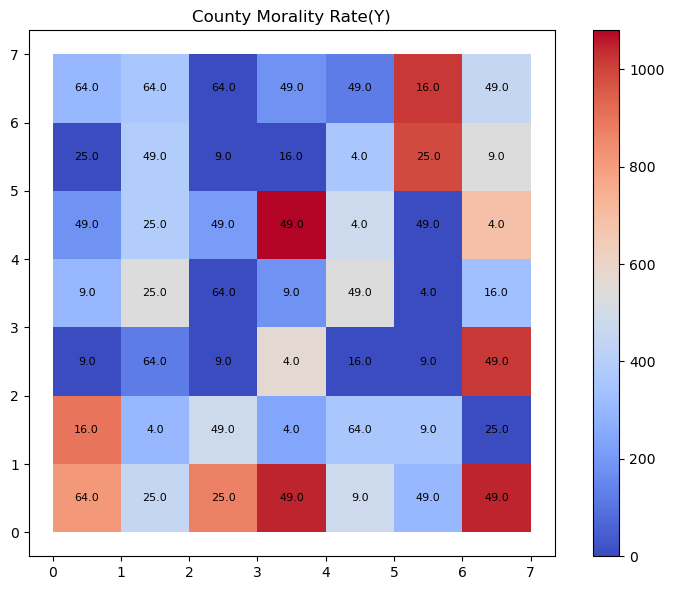

In [8]:
import matplotlib.pyplot as plt

# Create a figure with a single axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the county DataFrame using the 'Rate_cou' column
gdf_county.plot(column='Rate_cou', cmap='coolwarm', legend=True, ax=ax)

# Annotate each county with its census tract count (assumed stored in 'cencus_count')
for idx, row in gdf_county.iterrows():
    centroid = row.geometry.centroid  # Compute the centroid of the county geometry
    ax.annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )

ax.set_title("County Morality Rate(Y)")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [9]:
# import matplotlib.pyplot as plt

# # List of columns to plot
# columns = [
#     "Rate_cou", "up_AL", "up_AML", "up_TL", "up_TML",
#     "down_AL", "down_AML", "down_TL", "down_TML"
# ]

# # Create a 3x3 grid for the maps
# fig, axs = plt.subplots(3, 3, figsize=(18, 12))
# axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration

# for ax, col in zip(axs, columns):
#     # Plot the county DataFrame for the specified column
#     gdf_county.plot(column=col, cmap="coolwarm", legend=True, ax=ax)
    
#     # Annotate each county with its census tract count (assumed to be in 'cencus_count')
#     for idx, row in gdf_county.iterrows():
#         centroid = row.geometry.centroid  # Calculate the centroid of the county
#         ax.annotate(
#             text=str(row['cencus_count']),
#             xy=(centroid.x, centroid.y),
#             horizontalalignment="center",
#             verticalalignment="center",
#             fontsize=8,
#             color="black"
#         )
#     ax.set_title(col)

# plt.tight_layout()
# plt.show()


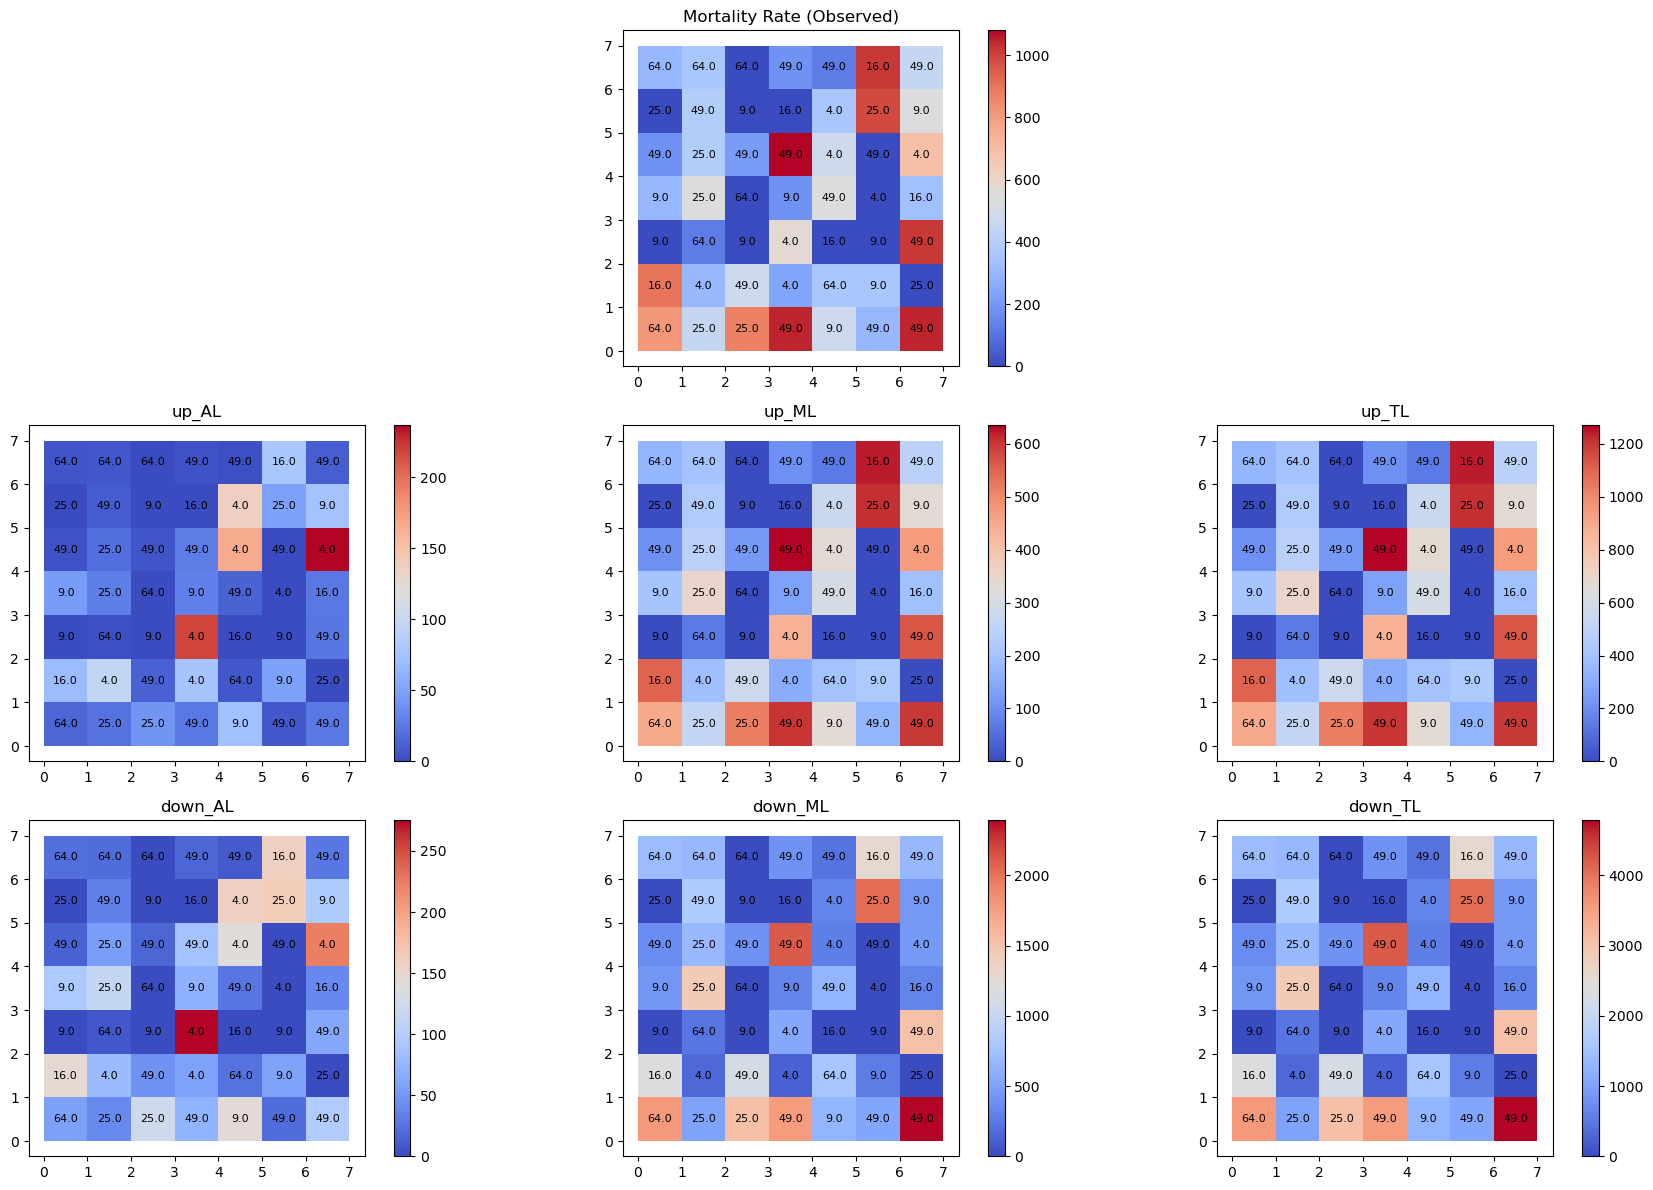

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a GridSpec layout: 3 rows and 3 columns.
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

# -------------------------------
# Top Row: Plot Rate_cou in the center cell (middle column)
# -------------------------------
ax_rate = fig.add_subplot(gs[0, 1])
gdf_county.plot(column='Rate_cou', cmap='coolwarm', legend=True, ax=ax_rate)
for idx, row in gdf_county.iterrows():
    centroid = row.geometry.centroid
    ax_rate.annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
ax_rate.set_title("Mortality Rate (Observed)")

# -------------------------------
# Middle Row: Plot 3 "up" methods
# -------------------------------
up_columns = ['up_AL', 'up_ML', 'up_TL']
up_axes = [fig.add_subplot(gs[1, i]) for i in range(3)]
for ax, col in zip(up_axes, up_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=True, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            color='black'
        )
    ax.set_title(col)

# -------------------------------
# Bottom Row: Plot 3 "down" methods
# -------------------------------
down_columns = ['down_AL', 'down_ML', 'down_TL']
down_axes = [fig.add_subplot(gs[2, i]) for i in range(3)]
for ax, col in zip(down_axes, down_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=True, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            color='black'
        )
    ax.set_title(col)

plt.tight_layout()
plt.show()


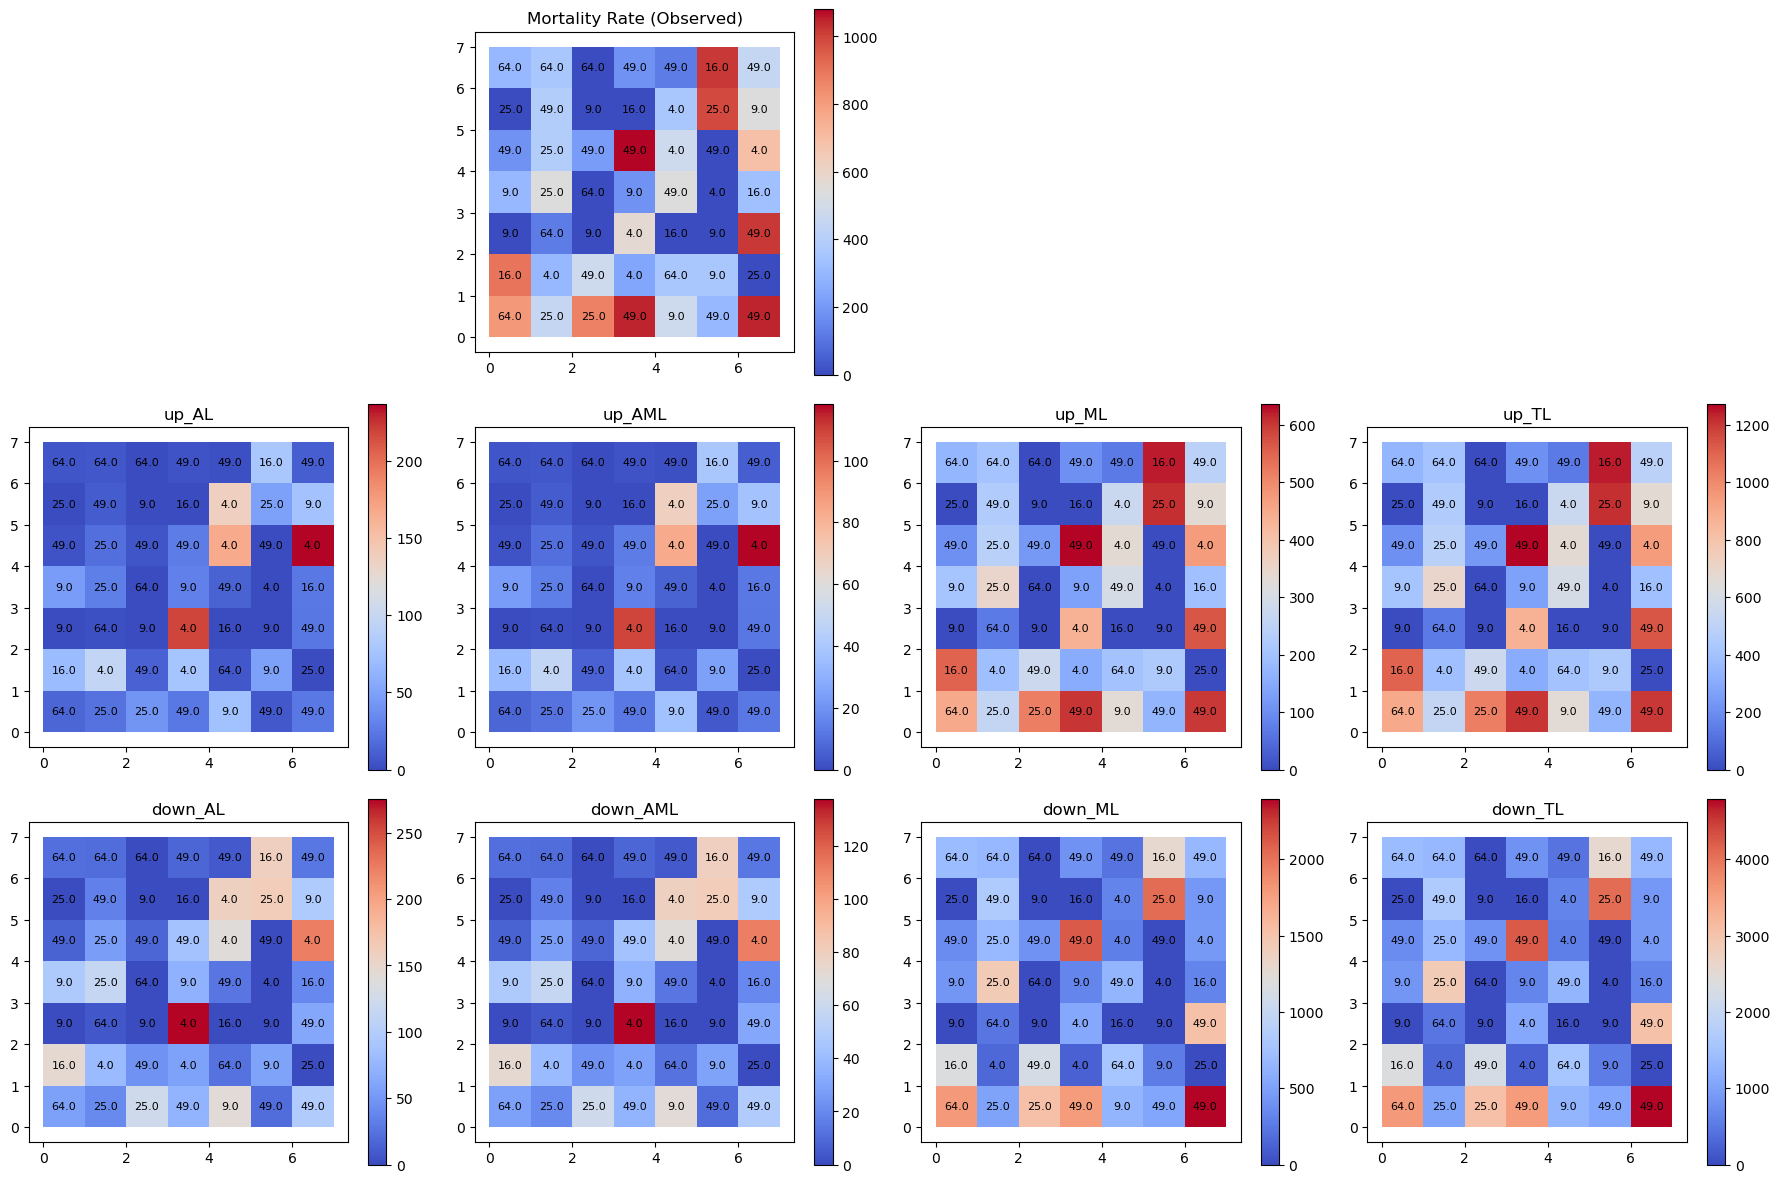

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a GridSpec layout: 3 rows and 3 columns.
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(3, 4, height_ratios=[1, 1, 1])

# -------------------------------
# Top Row: Plot Rate_cou in the center cell (middle column)
# -------------------------------
ax_rate = fig.add_subplot(gs[0, 1])
gdf_county.plot(column='Rate_cou', cmap='coolwarm', legend=True, ax=ax_rate)
for idx, row in gdf_county.iterrows():
    centroid = row.geometry.centroid
    ax_rate.annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
ax_rate.set_title("Mortality Rate (Observed)")

# -------------------------------
# Middle Row: Plot 3 "up" methods
# -------------------------------
up_columns = ['up_AL','up_AML', 'up_ML', 'up_TL']
up_axes = [fig.add_subplot(gs[1, i]) for i in range(4)]
for ax, col in zip(up_axes, up_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=True, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            color='black'
        )
    ax.set_title(col)

# -------------------------------
# Bottom Row: Plot 3 "down" methods
# -------------------------------
down_columns = ['down_AL','down_AML', 'down_ML', 'down_TL']
down_axes = [fig.add_subplot(gs[2, i]) for i in range(4)]
for ax, col in zip(down_axes, down_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=True, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            color='black'
        )
    ax.set_title(col)

plt.tight_layout()
plt.show()

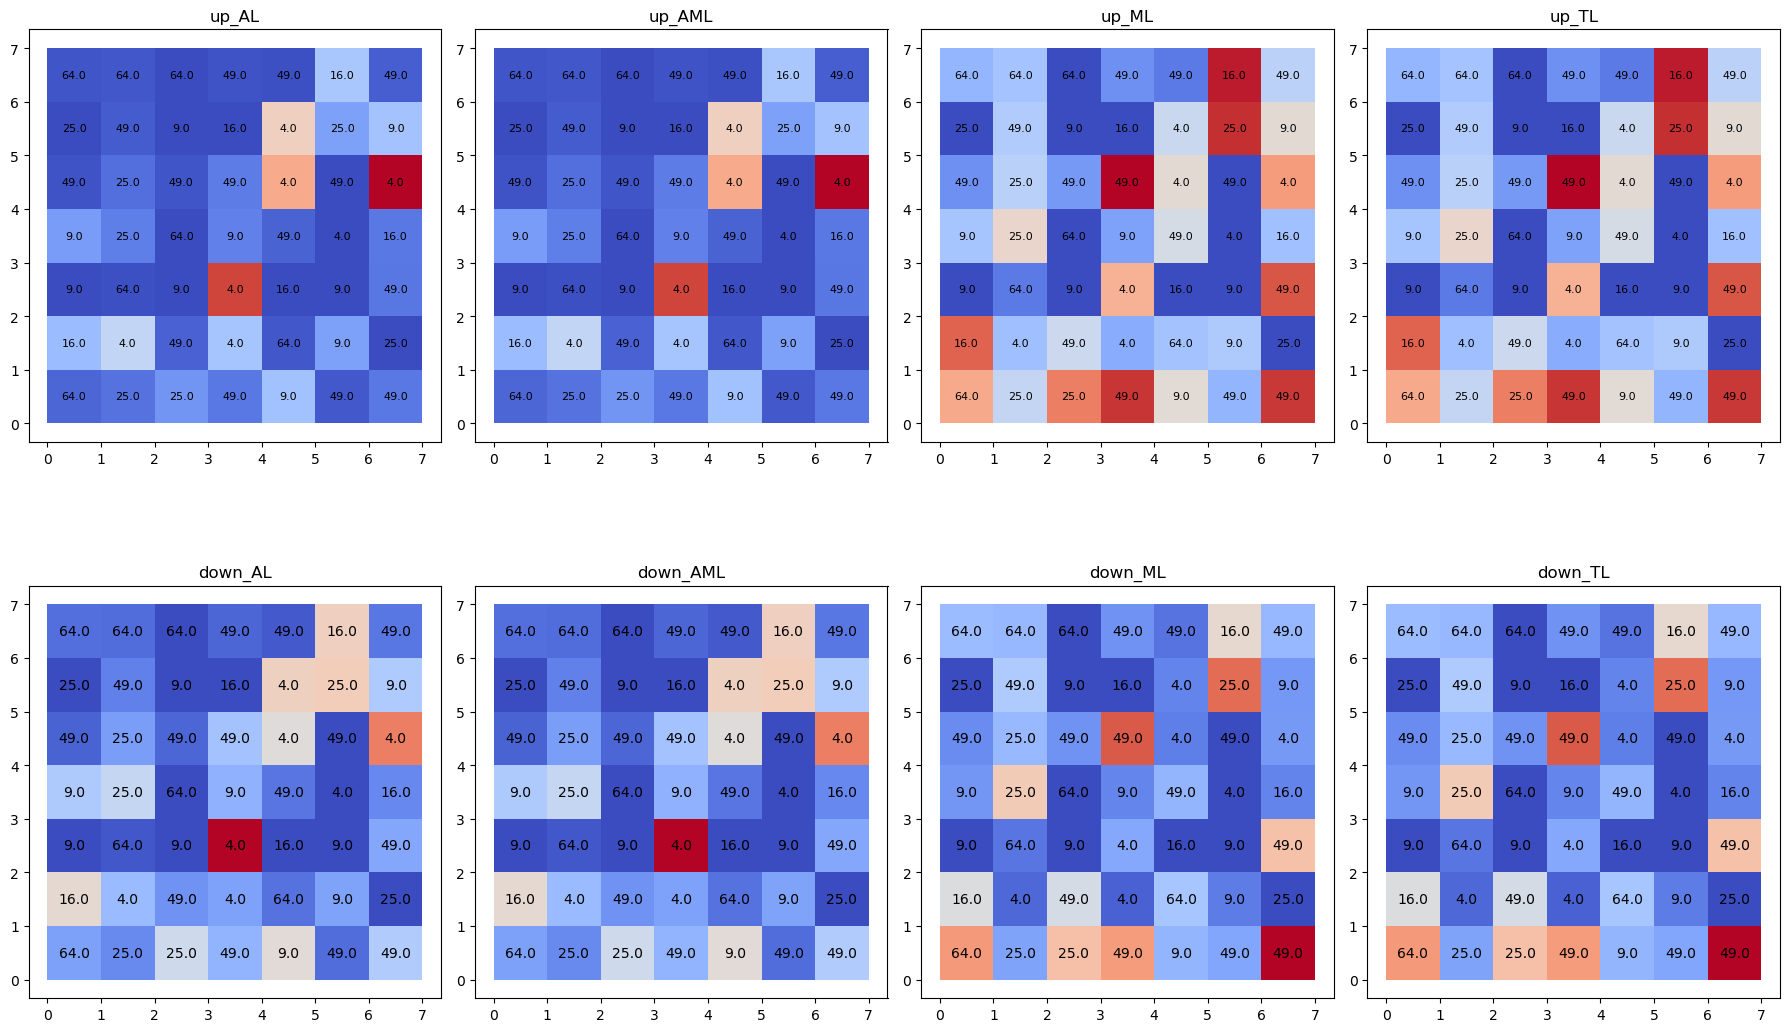

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a GridSpec layout: 3 rows and 3 columns.
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 4, height_ratios=[1, 1])


# -------------------------------
# Middle Row: Plot 3 "up" methods
# -------------------------------
up_columns = ['up_AL','up_AML', 'up_ML', 'up_TL']
up_axes = [fig.add_subplot(gs[0, i]) for i in range(4)]
for ax, col in zip(up_axes, up_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=False, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            color='black'
        )
    ax.set_title(col)

# -------------------------------
# Bottom Row: Plot 3 "down" methods
# -------------------------------
down_columns = ['down_AL','down_AML', 'down_ML', 'down_TL']
down_axes = [fig.add_subplot(gs[1, i]) for i in range(4)]
for ax, col in zip(down_axes, down_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=False, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10,
            color='black'
        )
    ax.set_title(col)

plt.tight_layout()
plt.show()

Scale test

In [13]:
gdf_county.head()

,Index_county,Rate_cou,geometry,up_AL,up_AML,up_TL,up_ML,down_AL,down_AML,down_TL,down_ML,cencus_count
0,0,810,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",14.044716,7.022358,898.861809,449.430904,55.986270,27.993135,3583.121288,1791.560644,64.0
1,1,450,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",20.943945,10.471973,523.598634,261.799317,40.777279,20.388639,1019.431963,509.715981,25.0
2,2,870,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",41.121906,20.560953,1028.047638,514.023819,122.590547,61.295274,3064.763686,1532.381843,25.0
3,3,1050,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))",24.549896,12.274948,1202.944921,601.472460,72.747249,36.373625,3564.615208,1782.307604,49.0
4,4,480,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))",73.573724,36.786862,662.163519,331.081759,142.653590,71.326795,1283.882307,641.941153,9.0


In [14]:
# min max scale the Rate_cou column and store it in a new column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gdf_county['Rate_cou_scaled'] = scaler.fit_transform(gdf_county[['Rate_cou']])
gdf_county['up_AL_scaled'] = scaler.fit_transform(gdf_county[['up_AL']])
gdf_county['up_AML_scaled'] = scaler.fit_transform(gdf_county[['up_AML']])
gdf_county['up_ML_scaled'] = scaler.fit_transform(gdf_county[['up_ML']])
gdf_county['up_TL_scaled'] = scaler.fit_transform(gdf_county[['up_TL']])
gdf_county['down_AL_scaled'] = scaler.fit_transform(gdf_county[['down_AL']])
gdf_county['down_AML_scaled'] = scaler.fit_transform(gdf_county[['down_AML']])
gdf_county['down_ML_scaled'] = scaler.fit_transform(gdf_county[['down_ML']])
gdf_county['down_TL_scaled'] = scaler.fit_transform(gdf_county[['down_TL']])
gdf_county.head()

,Index_county,Rate_cou,geometry,up_AL,up_AML,up_TL,up_ML,down_AL,down_AML,down_TL,...,cencus_count,Rate_cou_scaled,up_AL_scaled,up_AML_scaled,up_ML_scaled,up_TL_scaled,down_AL_scaled,down_AML_scaled,down_ML_scaled,down_TL_scaled
0,0,810,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",14.044716,7.022358,898.861809,449.430904,55.986270,27.993135,3583.121288,...,64.0,0.750000,0.059415,0.059415,0.707549,0.707549,0.203511,0.203511,0.748849,0.748849
1,1,450,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",20.943945,10.471973,523.598634,261.799317,40.777279,20.388639,1019.431963,...,25.0,0.416667,0.088601,0.088601,0.412156,0.412156,0.148226,0.148226,0.213055,0.213055
2,2,870,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",41.121906,20.560953,1028.047638,514.023819,122.590547,61.295274,3064.763686,...,25.0,0.805556,0.173962,0.173962,0.809239,0.809239,0.445620,0.445620,0.640516,0.640516
3,3,1050,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))",24.549896,12.274948,1202.944921,601.472460,72.747249,36.373625,3564.615208,...,49.0,0.972222,0.103856,0.103856,0.946911,0.946911,0.264438,0.264438,0.744982,0.744982
4,4,480,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))",73.573724,36.786862,662.163519,331.081759,142.653590,71.326795,1283.882307,...,9.0,0.444444,0.311246,0.311246,0.521229,0.521229,0.518549,0.518549,0.268323,0.268323


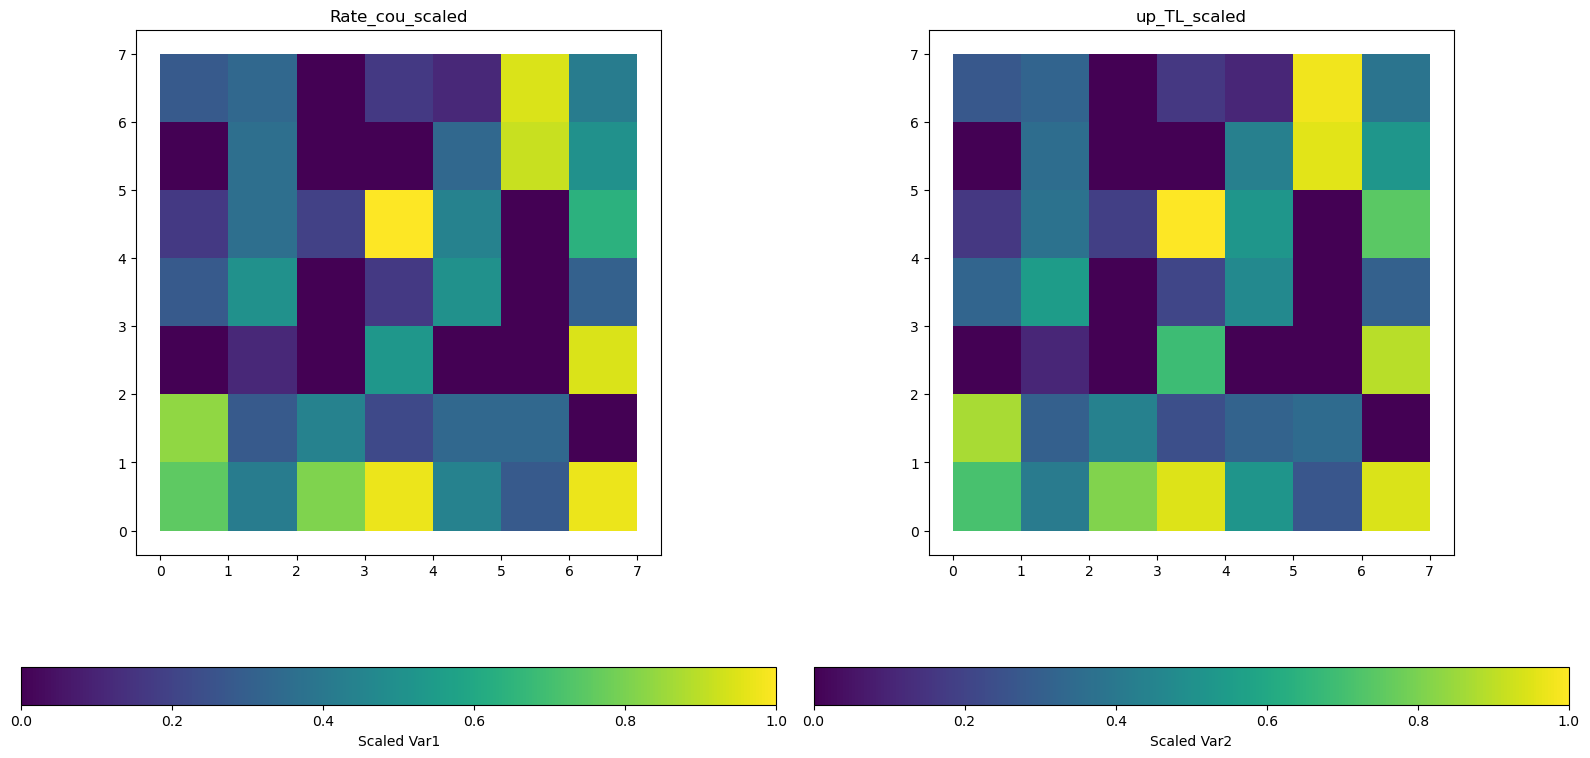

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Example: load your GeoDataFrame (replace this with your actual data loading code)
# gdf = gpd.read_file('your_file.shp')  # if reading from a file

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first variable on the left subplot
gdf_county.plot(column='Rate_cou_scaled',  # replace with your first scaled variable's name
         ax=ax1,
         cmap='viridis',       # choose a colormap of your liking
         legend=True,
         legend_kwds={'label': "Scaled Var1", 'orientation': "horizontal"})
ax1.set_title('Rate_cou_scaled')

# Plot the second variable on the right subplot
gdf_county.plot(column='up_TL_scaled',  # replace with your second scaled variable's name
         ax=ax2,
         cmap='viridis',        # choose a different colormap if desired
         legend=True,
         legend_kwds={'label': "Scaled Var2", 'orientation': "horizontal"})
ax2.set_title('up_TL_scaled')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [16]:
# add a clumn as difference between Rate_cou_scaled and up_TL_scaled
gdf_county['diff_rate_tl_scaled'] = gdf_county['Rate_cou_scaled'] - gdf_county['up_TL_scaled']


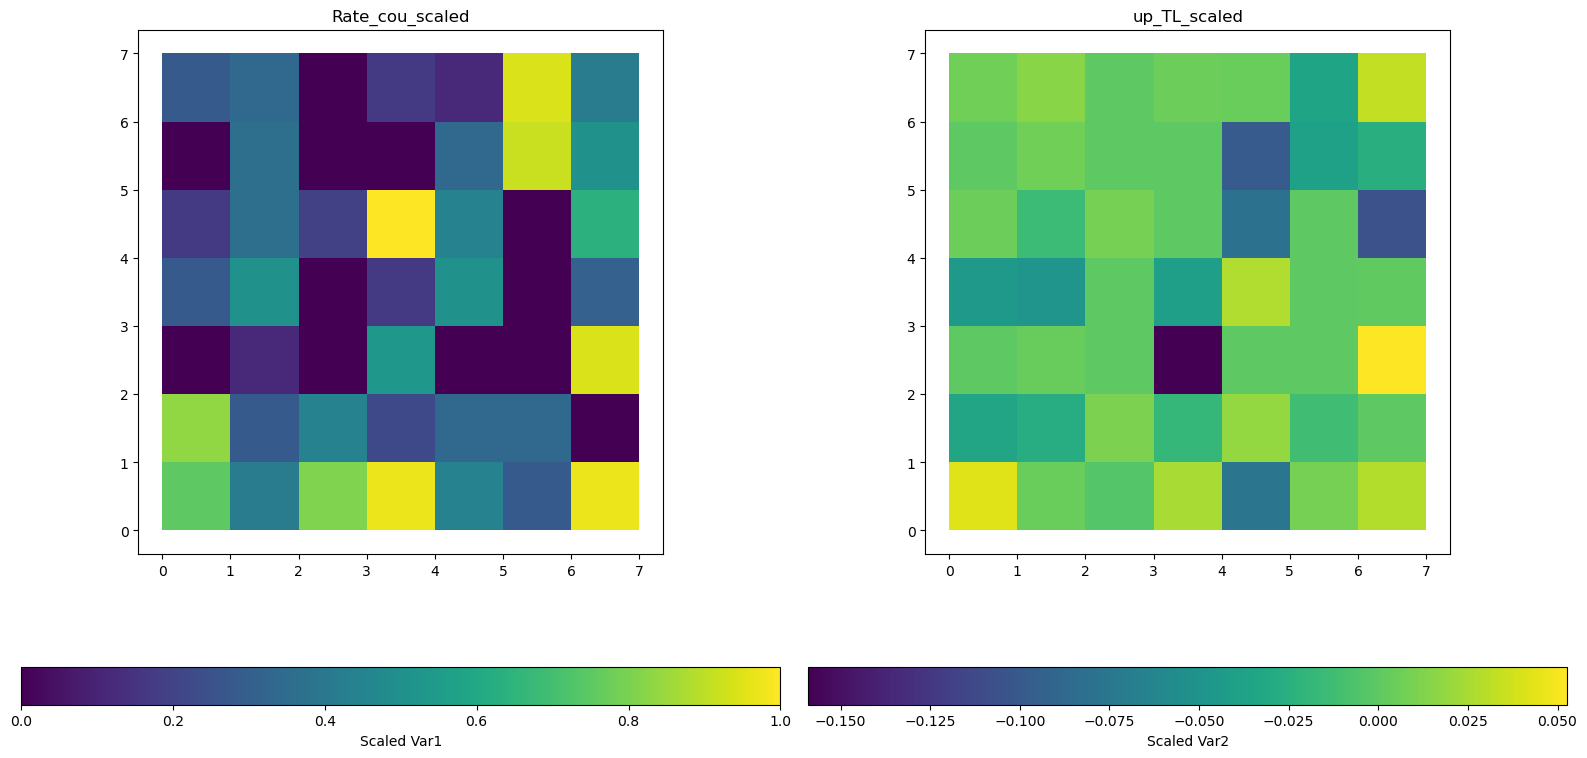

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Example: load your GeoDataFrame (replace this with your actual data loading code)
# gdf = gpd.read_file('your_file.shp')  # if reading from a file

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first variable on the left subplot
gdf_county.plot(column='Rate_cou_scaled',  # replace with your first scaled variable's name
         ax=ax1,
         cmap='viridis',       # choose a colormap of your liking
         legend=True,
         legend_kwds={'label': "Scaled Var1", 'orientation': "horizontal"})
ax1.set_title('Rate_cou_scaled')

# Plot the second variable on the right subplot
gdf_county.plot(column='diff_rate_tl_scaled',  # replace with your second scaled variable's name
         ax=ax2,
         cmap='viridis',        # choose a different colormap if desired
         legend=True,
         legend_kwds={'label': "Scaled Var2", 'orientation': "horizontal"})
ax2.set_title('up_TL_scaled')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


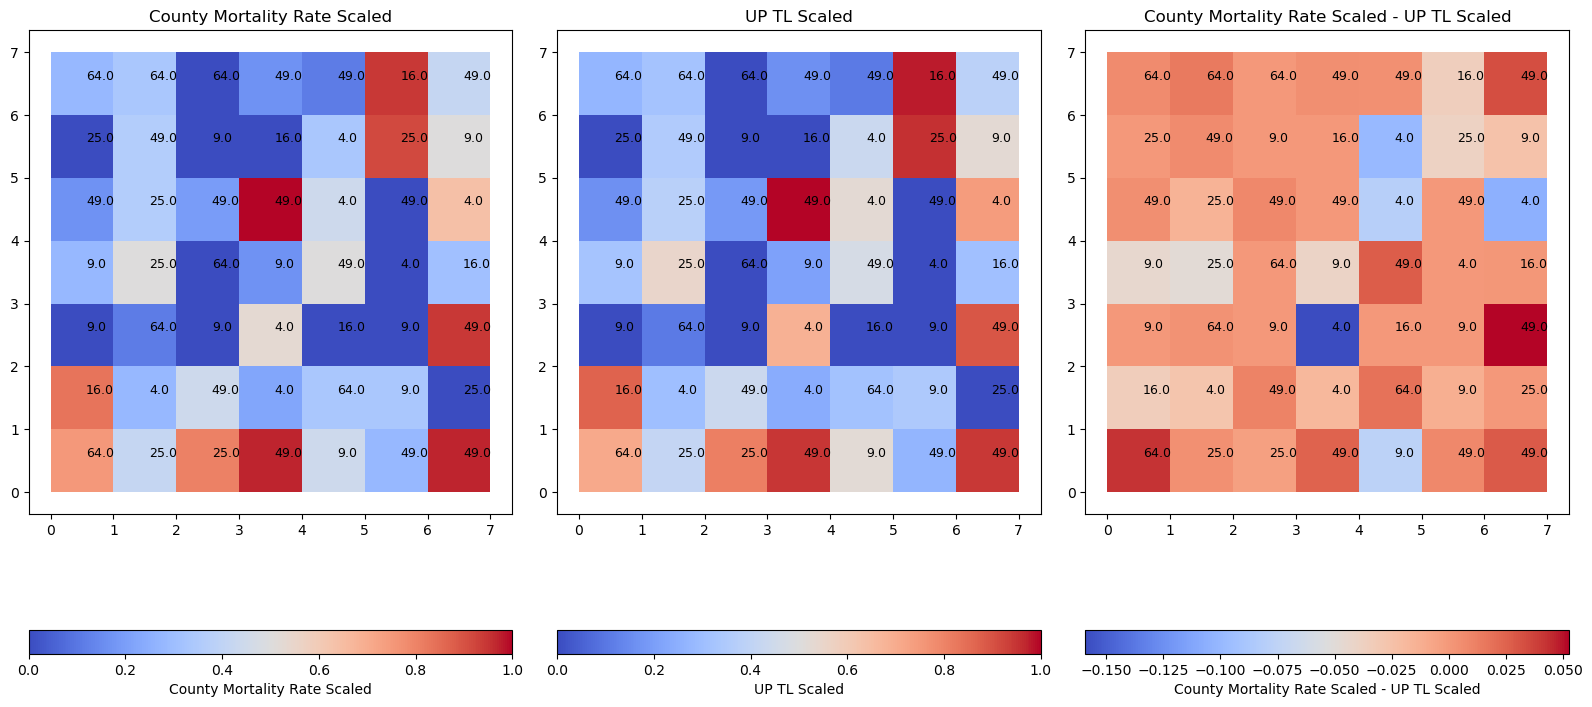

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Example: load your GeoDataFrame (replace this with your actual data loading code)
# gdf_county = gpd.read_file('your_file.shp')

# Optional: Project to a metric CRS (e.g., EPSG:3857) for more accurate centroid calculations
# gdf_county = gdf_county.to_crs(epsg=3857)

# Compute centroids for each county and add them as a new column
gdf_county['centroid'] = gdf_county.geometry.centroid

# Create a figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))

# -------------------------
# Plot 1: Rate_cou_scaled
# -------------------------
gdf_county.plot(column='Rate_cou_scaled',  # first scaled variable
                ax=ax1,
                cmap='coolwarm',
                legend=True,
                legend_kwds={'label': "County Mortality Rate Scaled", 'orientation': "horizontal"})
ax1.set_title('County Mortality Rate Scaled')

# Annotate each centroid with its Index_county value on the first subplot
for idx, row in gdf_county.iterrows():
    x, y = row.centroid.x, row.centroid.y
    ax1.annotate(text=row['cencus_count'], xy=(x, y), xytext=(3, 3),
                 textcoords="offset points", fontsize=9, color='black')

# -----------------------------
# Plot 2: up_TL_scaled
# -----------------------------
gdf_county.plot(column='up_TL_scaled',  # second scaled variable
                ax=ax2,
                cmap='coolwarm',
                legend=True,
                legend_kwds={'label': "UP TL Scaled", 'orientation': "horizontal"})
ax2.set_title('UP TL Scaled')

# Annotate each centroid with its Index_county value on the second subplot
for idx, row in gdf_county.iterrows():
    x, y = row.centroid.x, row.centroid.y
    ax2.annotate(text=row['cencus_count'], xy=(x, y), xytext=(3, 3),
                 textcoords="offset points", fontsize=9, color='black')

# -----------------------------
# Plot 3: diff_rate_tl_scaled
# -----------------------------
gdf_county.plot(column='diff_rate_tl_scaled',  # third scaled variable
                ax=ax3,
                cmap='coolwarm',
                legend=True,
                legend_kwds={'label': "County Mortality Rate Scaled - UP TL Scaled", 'orientation': "horizontal"})
ax3.set_title('County Mortality Rate Scaled - UP TL Scaled')

# Annotate each centroid with its Index_county value on the third subplot
for idx, row in gdf_county.iterrows():
    x, y = row.centroid.x, row.centroid.y
    ax3.annotate(text=row['cencus_count'], xy=(x, y), xytext=(3, 3),
                 textcoords="offset points", fontsize=9, color='black')

# Adjust layout and display all the plots at once
plt.tight_layout()
plt.show()


In [19]:
import numpy as np

# Set the random seed for reproducibility (optional)
np.random.seed(42)

# Mean (rate parameter, λ) for the Poisson distribution
lambda_param = 5 

# Generate 49 random counts from a Poisson(λ=5)
y_poisson = np.random.poisson(lam=lambda_param, size=49)

print("Poisson sample (size=49):")
print(y_poisson)

Poisson sample (size=49):
[ 5  4  4  5  5  3  5  4  6  7  2  5  5  6  4  6  6  1  7  2 11  4  3  8
  3  3  5  8  3  2  5  3  8 10  3  2  5  7  6  6  2  4  9  7 11  8  3  2
  3]


(array([0., 1., 6., 9., 6., 9., 6., 4., 4., 1., 1., 2., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <BarContainer object of 14 artists>)

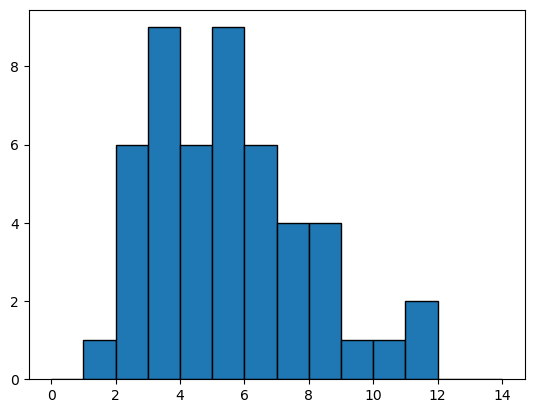

In [20]:
# plot the histogram of the Poisson sample
plt.hist(y_poisson, bins=range(0, 15), edgecolor='black')

Lambda values from N(0.5, 0.125):
 [16.86267807 14.48150887 17.42883202 20.71136196 14.12192484 14.12198641
 20.92204806 17.87788023 13.23947105 17.03460016 13.26218365 13.25351342
 15.90735852  7.82519908  8.53155813 12.89142177 11.2018833  16.1784275
 11.59490972  9.70386112 20.49618288 14.15333887 15.25323077  9.6571943
 12.95856478 15.41595971 10.68377408 16.40886757 12.74760491 13.90614844
 12.7436002  21.94604319 14.94938541 11.03358402 18.08454342 10.42183631
 15.78323848  7.65123704 10.01930232 15.73822963 17.76924967 15.64263105
 14.56631894 13.87086114  9.45554254 12.30058422 13.27260461 18.96420835
 16.28856859]

Poisson counts (one for each lambda):
 [12, 18, 20, 25, 12, 19, 18, 15, 16, 23, 8, 16, 19, 4, 8, 10, 17, 20, 17, 8, 21, 11, 13, 9, 13, 13, 8, 13, 16, 17, 14, 22, 19, 7, 19, 7, 11, 7, 10, 12, 19, 14, 18, 8, 5, 8, 15, 15, 13]


(array([0., 0., 0., 0., 1., 1., 0., 3., 6., 1., 2., 2., 3., 5., 2., 3., 3.,
        3., 3., 5., 2., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
        91., 92., 93., 94., 95., 96., 97., 

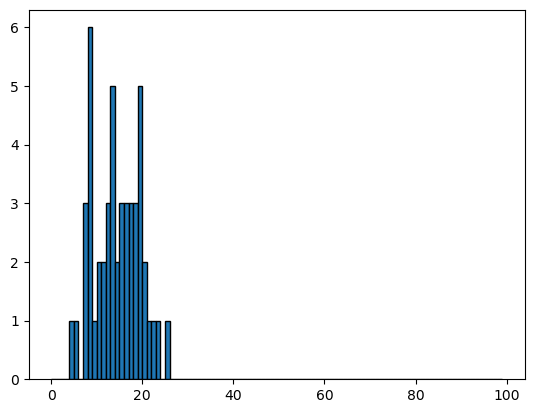

In [21]:
import numpy as np

# For reproducibility
np.random.seed(42)

# 1. Sample 49 lambda values from Normal(mean=0.5, sd=0.125)
lambda_vals = np.random.normal(loc=0.5, scale=0.125, size=49)

# Optionally ensure lambda values are non-negative (Poisson λ must be >= 0)
# If you'd like to do that, uncomment the line below:
# lambda_vals = np.clip(lambda_vals, a_min=0, a_max=None)

E = 30

lambda_vals = lambda_vals*E

# 2. Generate Poisson counts using each lambda
poisson_counts = [np.random.poisson(lam) for lam in lambda_vals]

print("Lambda values from N(0.5, 0.125):\n", lambda_vals)
print("\nPoisson counts (one for each lambda):\n", poisson_counts)

# plot the histogram of the Poisson sample
plt.hist(poisson_counts, bins=range(0, 100), edgecolor='black')
